In [1]:
!export PATH="/home/fzaidoun/anaconda3/envs/him/bin:$PATH"

In [2]:
!conda install -c conda-forge dynesty -y

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.7.12
  latest version: 4.10.1

Please update conda by running

    $ conda update -n base conda



## Package Plan ##

  environment location: /home/fzaidoun/anaconda3/envs/him

  added / updated specs:
    - dynesty


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    dynesty-1.1                |     pyh44b312d_0          70 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          70 KB

The following NEW packages will be INSTALLED:

  dynesty            conda-forge/noarch::dynesty-1.1-pyh44b312d_0



dynesty-1.1          | 70 KB     | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done


In [1]:
import numpy as np
from astropy.io import ascii
from functions import *

In [4]:
print("loading data")
cols = ['Mstar',
        'flag_vsquared',
        'flag_voidfinder']
data = ascii.read('../data_flags_updated_Nov1.dat', include_names=cols)
Mstar = data['Mstar']

print("loading classification")
#classification V^2
wall_v2 = np.argwhere(data['flag_vsquared'] == 0).flatten()
void_v2 = np.argwhere(data['flag_vsquared'] == 1).flatten()
edge_v2 = np.argwhere(data['flag_vsquared'] == 2).flatten()
out_v2 = np.argwhere(data['flag_vsquared'] == 9).flatten()

#classification voidfinder
wall_vf = np.argwhere(data['flag_voidfinder'] == 0).flatten()
void_vf = np.argwhere(data['flag_voidfinder'] == 1).flatten()
edge_vf = np.argwhere(data['flag_voidfinder'] == 2).flatten()
out_vf = np.argwhere(data['flag_voidfinder'] == 9).flatten()

## property variables
print("loading property model variables")

# data and range
data1_wall_vf = remove_nan(Mstar[wall_vf])
data2_void_vf = remove_nan(Mstar[void_vf])
data1_wall_v2 = remove_nan(Mstar[wall_v2])
data2_void_v2 = remove_nan(Mstar[void_v2])
bins_ = np.linspace(5.9,12, 135)
label_vf = 'Mstar_VF'
label_v2 = 'Mstar_V2'

loading data
loading classification
loading property model variables


plotting histograms of data...


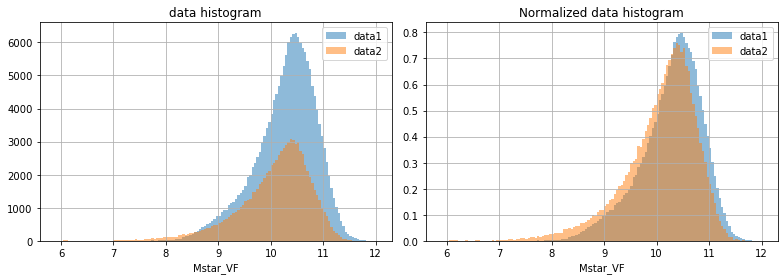

In [5]:
plot_hist(data1_wall_vf,data2_void_vf,bins_,label_vf)


In [7]:
bounds1 = [[2, 3],     # s ........ scale factor (peak 1 to 2) #2.5

           [1000, 7000.],  # a ........ skew normal 1 amplitude # 2000 and 100
           [10, 11],     # mu_a ..... skew normal 1 location  # 0.5
           [0.1,3],     # sigma_a .. skew normal 1 scale #0.2
           [-10., 10.],    # a_skew ... skew normal 1 skew

           [0, 7000.],  # b ........ skew normal 2 amplitude #6100 and 150
           [11.5, 12],     # mu_b ..... skew normal 2 location #0.9  # should not overlap with mu_a
           [0.1, 2],     # sigma_b .. skew normal 2 scale #0.1
           [-10., 10.]]    # b_skew ... skew normal 2 skew
[ 5.13940713e-01
 7.42446839e+03
 1.09161705e+01
 9.14401200e-01
 -3.49263948e+00 
 4.43024546e+02 
 1.15028817e+01 
 1.93419696e+00
 -9.81341286e+00]

In [8]:
def prior_xform1(u):
    """Priors for the 9 parameters of model M1. Required by the dynesty sampler.

    Parameters
    ----------
    u : ndarray
        Array of uniform random numbers between 0 and 1.

    Returns
    -------
    priors : ndarray
        Transformed random numbers giving prior ranges on model parameters.
    """
    s       = uniform(0.1, 10., u[0])
    a       = jeffreys(1., 1e4, u[1])
    mu_a    = uniform(10, 11, u[2])
    sigma_a = jeffreys(0.1, 2., u[3])
    xi_a    = uniform(-10., 10., u[4])
    b       = jeffreys(1., 1e4, u[5])
    mu_b    = uniform(11.5, 12., u[6])
    sigma_b = jeffreys(0.05, 2., u[7])
    xi_b    = uniform(-10., 10., u[8])

    return s, a, mu_a, sigma_a, xi_a, b, mu_b, sigma_b, xi_b

In [ ]:
bounds1 = [[2, 3],     # s ........ scale factor (peak 1 to 2) #2.5

           [1000, 7000.],  # a ........ skew normal 1 amplitude # 2000 and 100
           [10, 11],     # mu_a ..... skew normal 1 location  # 0.5
           [0.1,3],     # sigma_a .. skew normal 1 scale #0.2
           [-10., 10.],    # a_skew ... skew normal 1 skew

           [0, 7000.],  # b ........ skew normal 2 amplitude #6100 and 150
           [11.5, 12],     # mu_b ..... skew normal 2 location #0.9  # should not overlap with mu_a
           [0.1, 2],     # sigma_b .. skew normal 2 scale #0.1
           [-10., 10.]]    # b_skew ... skew normal 2 skew
[ 5.13940713e-01
 7.42446839e+03
 1.09161705e+01
 9.14401200e-01
 -3.49263948e+00 
 4.43024546e+02 
 1.15028817e+01 
 1.93419696e+00
 -9.81341286e+00]

In [11]:
bounds1_ = [[4000., 9000.],  # a ........ skew normal 1 amplitude #2000
        [10, 12],     # mu_a ..... skew normal 1 location #0.5
        [0.1, 2.0],     # sigma_a .. skew normal 1 scale #0.7
        [-10., 10.],    # a_skew ... skew normal 1 skew
        [0., 100.],  # b ........ skew normal 2 amplitude #6100
        [5, 6],     # mu_b ..... skew normal 2 location #0.9
        [0.1, 2.0],     # sigma_b .. skew normal 2 scale #0.4
        [-10., 10.]]    # a_skew ... skew normal 2 skew

bounds2_ = [[100., 1000.],   # g ........ skew normal 3 amplitude #200
            [0.0, 0.7],     # mu_g ..... skew normal 3 location #0.5
            [10,12],     # sigma_g .. skew normal 3 scale #0.6
            [-10., 10.],    # g_skew ... skew normal 3 skew
            [0., 100.],   # d ........ skew normal 4 amplitude #800
            [5, 6],     # mu_d ..... skew normal 4 location #0.8
            [0.1, 2.0],     # sigma_d .. skew normal 4 scale #0.3
            [-10., 10.]]    # d_skew ... skew normal 4 skew
bounds2 = bounds1_ + bounds2_

VoidFinder (VF)
plotting histograms of data...


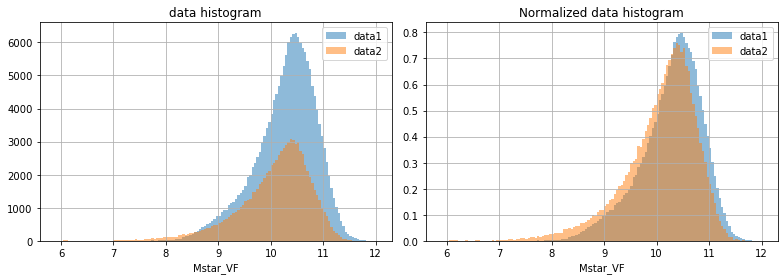

Running Model 1 using VF...


In [12]:

def prior_xform2(u):
    """Priors for the 9 parameters of model M1. Required by the dynesty sampler.

    Parameters
    ----------
    u : ndarray
        Array of uniform random numbers between 0 and 1.

    Returns
    -------
    priors : ndarray
        Transformed random numbers giving prior ranges on model parameters.
    """
    a       = jeffreys(1., 1e4, u[0])
    mu_a    = uniform(10., 12., u[1])
    sigma_a = jeffreys(0.05, 2., u[2])
    xi_a    = uniform(-10., 10., u[3])
    b       = jeffreys(0., 100., u[4])
    mu_b    = uniform(5, 6, u[5])
    sigma_b = jeffreys(0.1, 2., u[6])
    xi_b    = uniform(-10., 10., u[7])

    g       = jeffreys(1., 1e4, u[8])
    mu_g    = uniform(10., 12., u[9])
    sigma_g = jeffreys(0.05, 2., u[10])
    xi_g    = uniform(-10., 10., u[11])
    d       = jeffreys(0., 100., u[12])
    mu_d    = uniform(5, 6, u[13])
    sigma_d = jeffreys(0.1, 2., u[14])
    xi_d    = uniform(-10., 10., u[15])

    return a, mu_a, sigma_a, xi_a, \
           b, mu_b, sigma_b, xi_b, \
           g, mu_g, sigma_g, xi_g, \
           d, mu_d, sigma_d, xi_d


#for VF
print("VoidFinder (VF)")
plot_hist(data1_wall_vf,data2_void_vf,bins_,label_vf)
#model 1
print("Running Model 1 using VF...")

running minimizer...this might take a few minutes...
best fit parameters       fun: 63567.62023086515
 hess_inv: <9x9 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 4.28703260e+04, -2.91041382e-03, -3.25235278e+00, -7.56699588e-01,
       -5.33327696e-01, -7.27595184e-04,  9.37255313e+02,  1.47701940e-01,
        1.31185505e+01])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 1260
      nit: 87
     njev: 126
   status: 0
  success: True
        x: array([ 2.00000000e+00,  3.74256214e+03,  1.09157849e+01,  9.12939237e-01,
       -3.48870179e+00,  2.31805094e+02,  1.15000000e+01,  1.95005978e+00,
       -1.00000000e+01])
running the nested sampler... this might take from minutes to hours...


iter: 42160 | batch: 7 | bound: 493 | nc: 7 | ncall: 428905 | eff(%):  9.830 | loglstar: -5196.783 < -5187.377 < -5189.370 | logz: -5238.127 +/-  0.423 | stop:  0.953                                

sampler output saved as pickle file 'sampler_results_model1_Mstar_VF'
plotting corner plots...
The maximum a posteriori (MAP) values of the parameters:  [ 5.13940713e-01  7.42446839e+03  1.09161705e+01  9.14401200e-01
 -3.49263948e+00  4.43024546e+02  1.15028817e+01  1.93419696e+00
 -9.81341286e+00]
Best fit results: 
Bayesian Evidence for model 1 :  -5238.134136723527


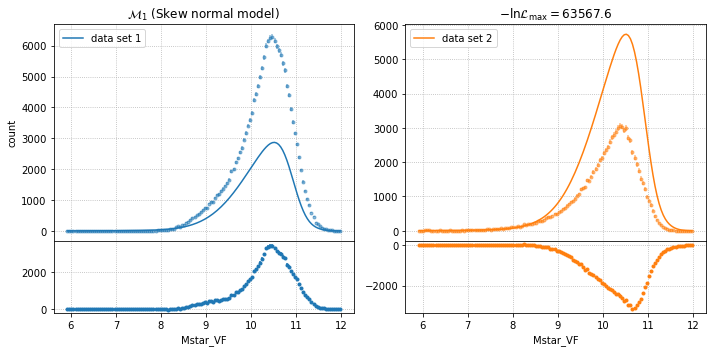

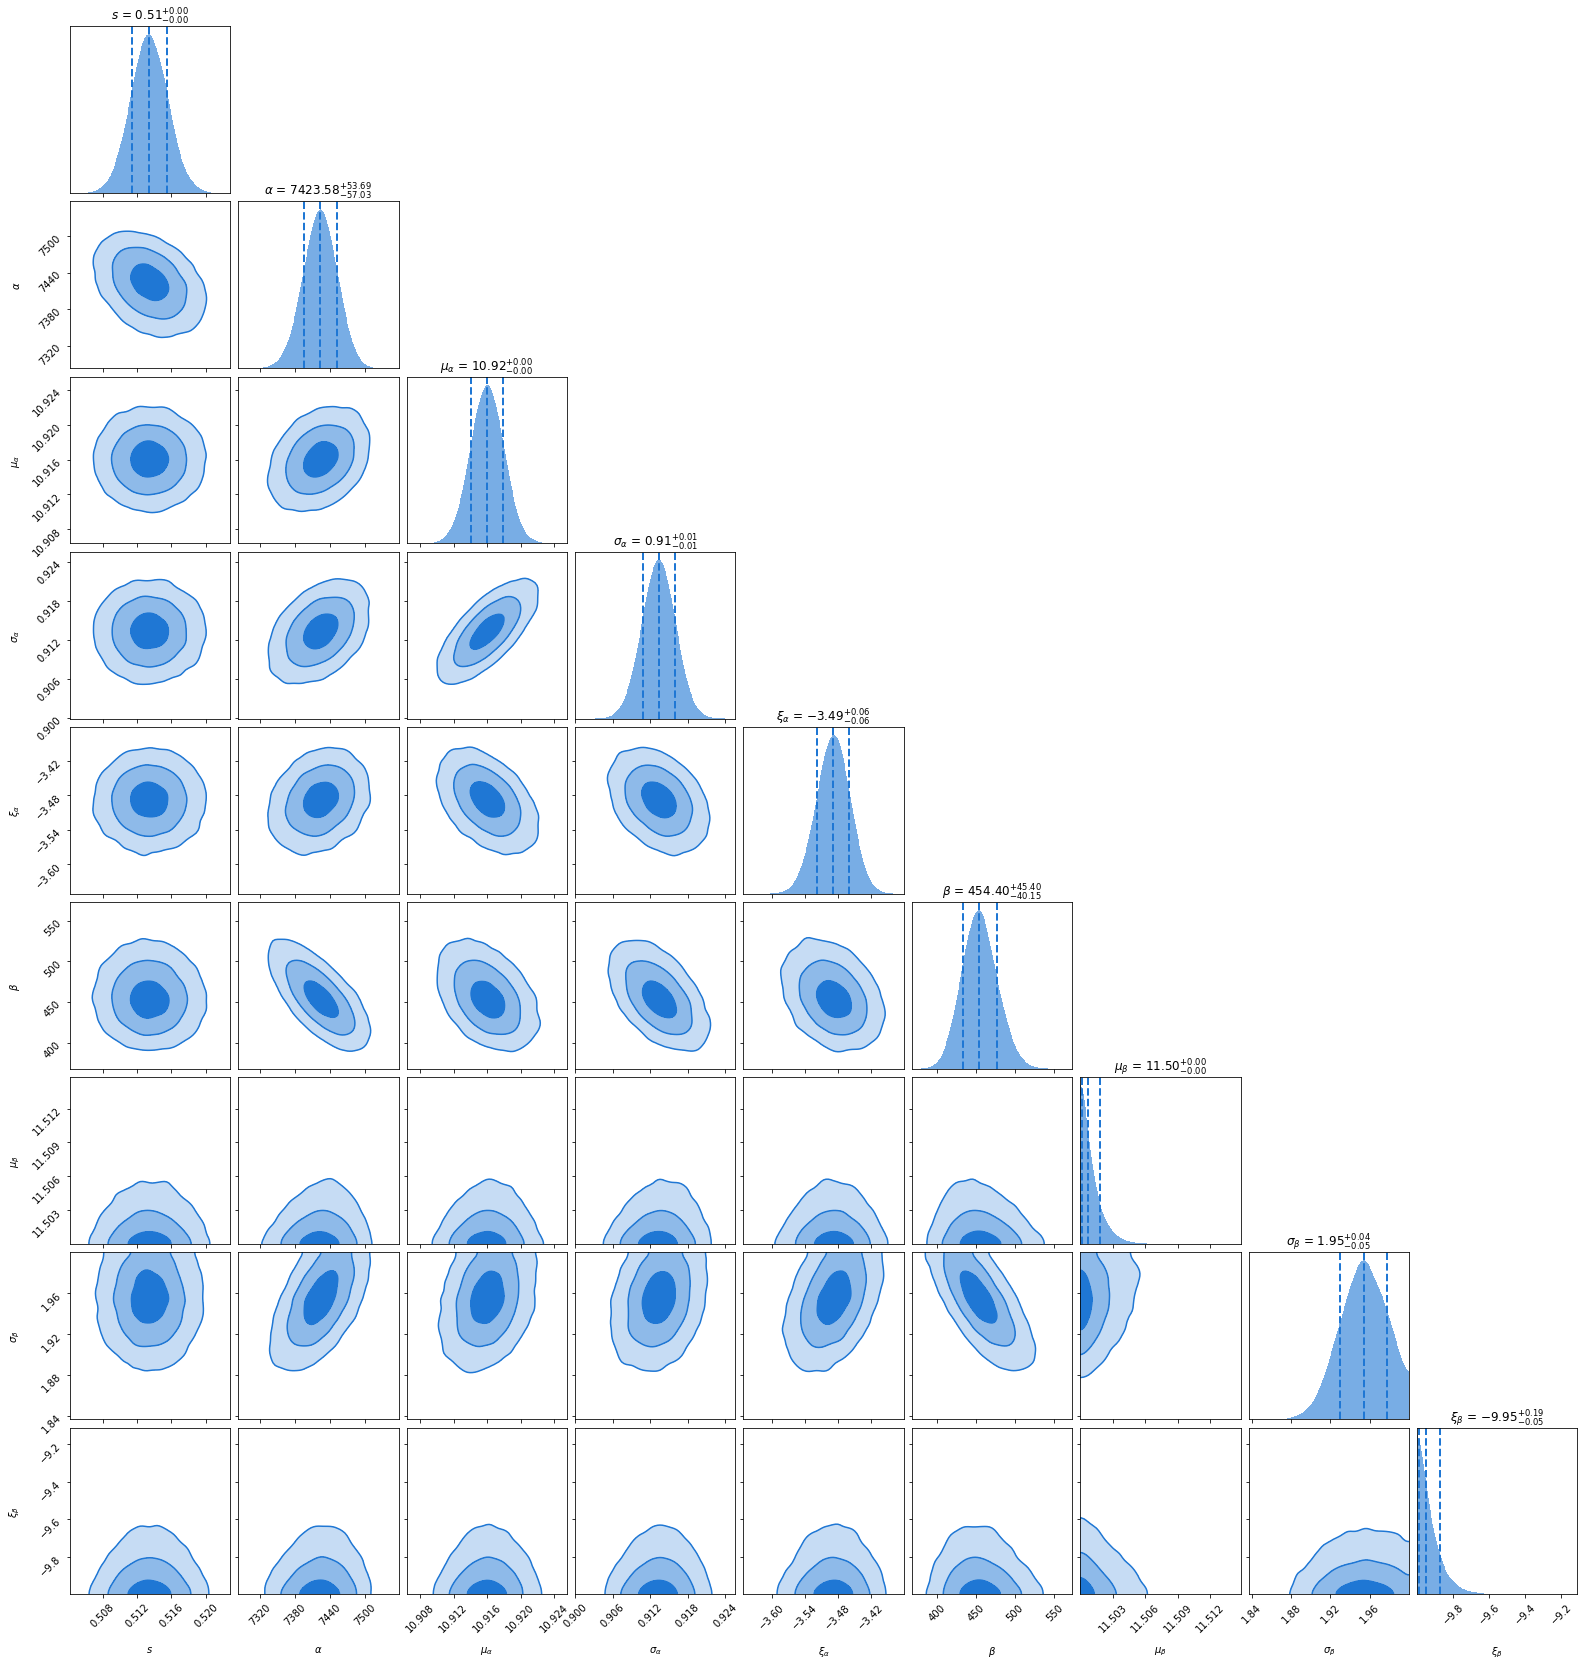

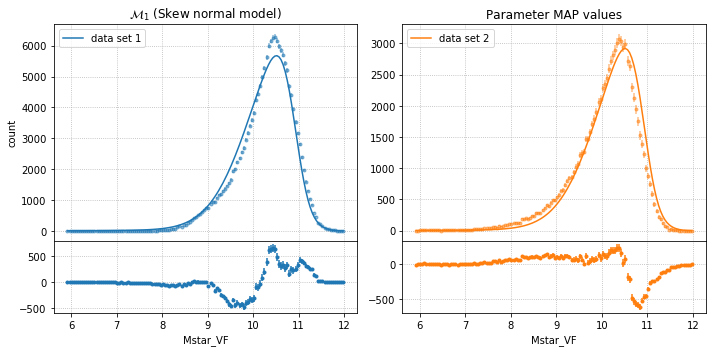

In [9]:
Model_1_fit(bounds1,data1_wall_vf,data2_void_vf,bins_,label_vf)
Model_1_sampler(prior_xform1,data1_wall_vf,data2_void_vf,bins_,label_vf)
lnZ1_vf = Model1_output(data1_wall_vf,data2_void_vf,bins_,label_vf)

Running Model 2 using VF...
running minimizer...this might take a few minutes...
plotting best fit results...
running the nested sampler... this might take from minutes to hours...


iter: 10052 | batch: 0 | bound: 125 | nc: 25 | ncall: 224370 | eff(%):  4.470 | loglstar:   -inf < -7145.552 <    inf | logz: -7171.246 +/-  0.317 | dlogz: 3735.675 >  0.010                         /home/fzaidoun/anaconda3/envs/him/lib/python3.6/site-packages/dynesty/sampling.py:221: UserWarning: Random number generation appears to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random number generation appears to be "
iter: 10229 | batch: 0 | bound: 129 | nc: 26 | ncall: 228863 | eff(%):  4.460 | loglstar:   -inf < -6749.584 <    inf | logz: -6776.384 +/-  0.324 | dlogz: 3341.265 >  0.010                         /home/fzaidoun/anaconda3/envs/him/lib/python3.6/site-packages/dynesty/sampling.py:221: UserWarning: Random number generation appears to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random number generation appears to be "
iter: 11014 | batch: 0 | bound: 141 | nc: 25 | ncall: 248656 | eff(%):  4.421 | logl

iter: 14673 | batch: 0 | bound: 196 | nc: 25 | ncall: 343334 | eff(%):  4.267 | loglstar:   -inf < -2980.557 <    inf | logz: -3013.931 +/-  0.361 | dlogz: 398.056 >  0.010                          /home/fzaidoun/anaconda3/envs/him/lib/python3.6/site-packages/dynesty/sampling.py:221: UserWarning: Random number generation appears to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random number generation appears to be "
iter: 14870 | batch: 0 | bound: 199 | nc: 25 | ncall: 348383 | eff(%):  4.262 | loglstar:   -inf < -2941.232 <    inf | logz: -2975.847 +/-  0.365 | dlogz: 359.737 >  0.010                          /home/fzaidoun/anaconda3/envs/him/lib/python3.6/site-packages/dynesty/sampling.py:221: UserWarning: Random number generation appears to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random number generation appears to be "
iter: 14993 | batch: 0 | bound: 201 | nc: 25 | ncall: 351725 | eff(%):  4.257 | logl

iter: 19611 | batch: 0 | bound: 272 | nc: 25 | ncall: 471037 | eff(%):  4.159 | loglstar:   -inf < -2582.181 <    inf | logz: -2623.355 +/-  0.400 | dlogz: 30.174 >  0.010                           /home/fzaidoun/anaconda3/envs/him/lib/python3.6/site-packages/dynesty/sampling.py:221: UserWarning: Random number generation appears to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random number generation appears to be "
iter: 19894 | batch: 0 | bound: 276 | nc: 25 | ncall: 478371 | eff(%):  4.154 | loglstar:   -inf < -2577.559 <    inf | logz: -2619.282 +/-  0.403 | dlogz: 25.535 >  0.010                           /home/fzaidoun/anaconda3/envs/him/lib/python3.6/site-packages/dynesty/sampling.py:221: UserWarning: Random number generation appears to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random number generation appears to be "
iter: 20411 | batch: 0 | bound: 283 | nc: 25 | ncall: 491466 | eff(%):  4.149 | logl

iter: 26519 | batch: 0 | bound: 372 | nc: 25 | ncall: 647472 | eff(%):  4.093 | loglstar:   -inf < -2549.729 <    inf | logz: -2598.636 +/-  0.428 | dlogz:  0.037 >  0.010                           /home/fzaidoun/anaconda3/envs/him/lib/python3.6/site-packages/dynesty/sampling.py:221: UserWarning: Random number generation appears to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random number generation appears to be "
iter: 26679 | batch: 0 | bound: 375 | nc: 25 | ncall: 651839 | eff(%):  4.090 | loglstar:   -inf < -2549.659 <    inf | logz: -2598.631 +/-  0.428 | dlogz:  0.028 >  0.010                           /home/fzaidoun/anaconda3/envs/him/lib/python3.6/site-packages/dynesty/sampling.py:221: UserWarning: Random number generation appears to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random number generation appears to be "
iter: 27158 | batch: 0 | bound: 382 | nc: 25 | ncall: 664063 | eff(%):  4.087 | logl

sampler output saved as pickle file 'sampler_results_model2_Mstar_VF'
plotting corner plots...


/home/fzaidoun/anaconda3/envs/him/lib/python3.6/site-packages/dynesty/plotting.py:1199: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(span[i])
/home/fzaidoun/anaconda3/envs/him/lib/python3.6/site-packages/dynesty/plotting.py:2238: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  ax.set_ylim(span[1])
/home/fzaidoun/anaconda3/envs/him/lib/python3.6/site-packages/dynesty/plotting.py:2237: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(span[0])


The maximum a posteriori (MAP) values of the parameters:  [ 7.87046803e+03  1.09587231e+01  9.07107079e-01 -3.14619350e+00
  0.00000000e+00  5.49535028e+00  4.47023423e-01 -6.88103712e-02
  4.04061323e+03  1.08901012e+01  1.07776298e+00 -4.23004742e+00
  0.00000000e+00  5.50362091e+00  4.46132892e-01 -6.98724537e-02]
Best fit results: 
Bayesian Evidence for model 2 :  -2598.6405811286145


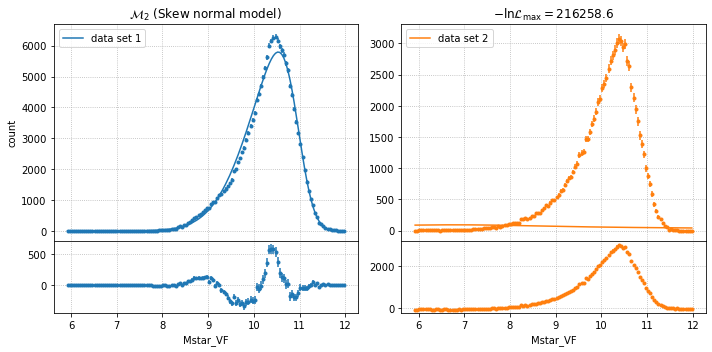

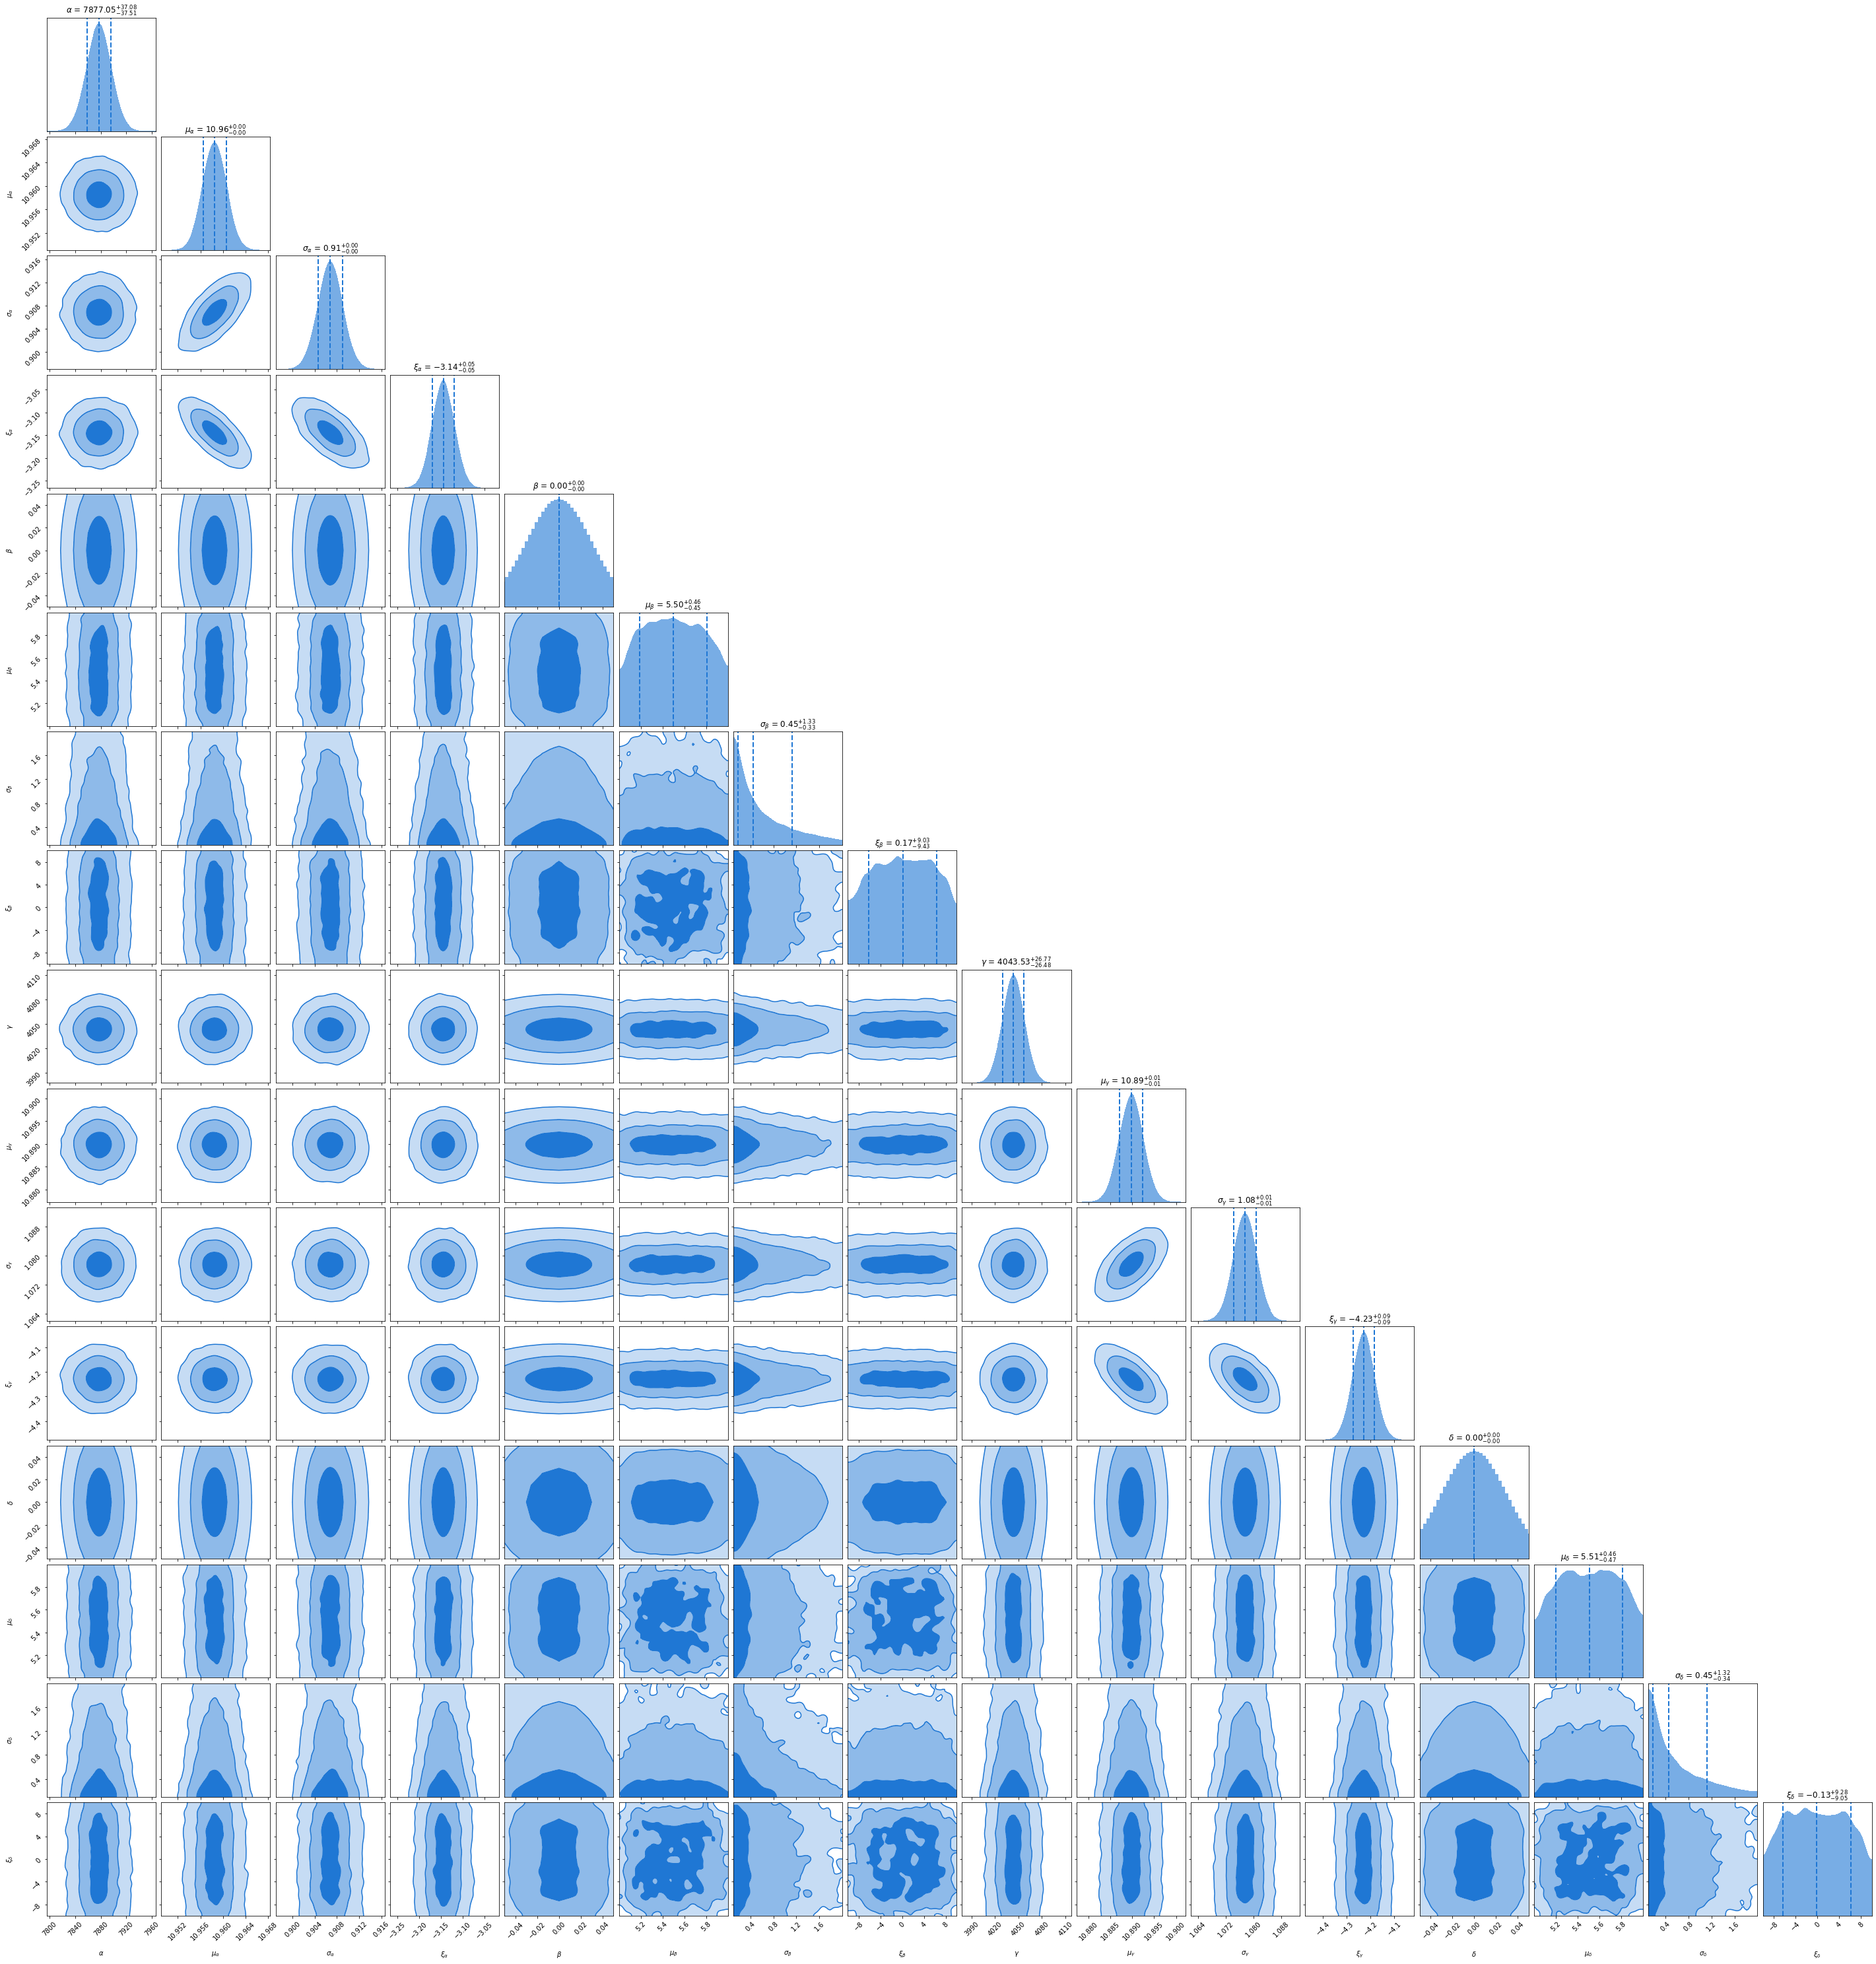

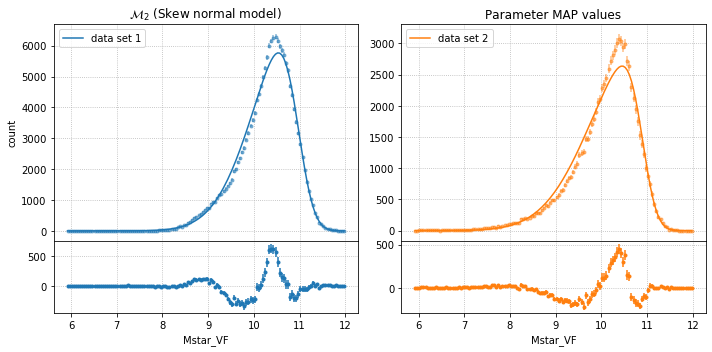

In [13]:
#model2
print("Running Model 2 using VF...")

Model_2_fit(bounds2,data1_wall_vf,data2_void_vf,bins_,label_vf)
Model_2_sampler(prior_xform2,data1_wall_vf,data2_void_vf,bins_,label_vf)
lnZ2_vf = Model2_output(data1_wall_vf,data2_void_vf,bins_,label_vf)




In [17]:
#Baye's Factor
lnB12_vf = lnZ1_vf - lnZ2_vf
logB12_vf = np.log10(np.e) * lnB12_vf
print("Log10 of Baye's Factor for g-r using VF is: ", logB12_vf)


Log10 of Baye's Factor for g-r using VF is:  -1543.9141956411331


running minimizer...this might take a few minutes...
best fit parameters       fun: 3206.844425200683
 hess_inv: <9x9 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 8.89429935e+02,  3.81991814e-03,  3.00628901e+00, -1.98679117e-01,
        3.93811208e-02,  1.08229784e-02,  2.78374577e+03, -4.59084006e+02,
        3.88346930e+01])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 1870
      nit: 137
     njev: 187
   status: 0
  success: True
        x: array([ 2.00000000e+00,  4.15818857e+03,  1.09210395e+01,  8.98460512e-01,
       -3.58064470e+00,  4.20431528e+02,  1.15000000e+01,  2.00000000e+00,
       -1.00000000e+01])
running the nested sampler... this might take from minutes to hours...


iter: 41761 | batch: 6 | bound: 590 | nc: 16 | ncall: 510113 | eff(%):  8.187 | loglstar: -3194.240 < -3184.798 < -3187.792 | logz: -3239.654 +/-  0.442 | stop:  0.999                               

sampler output saved as pickle file 'sampler_results_model1_Mstar_V2'
plotting corner plots...
The maximum a posteriori (MAP) values of the parameters:  [ 1.94957056e+00  4.23052790e+03  1.09211511e+01  8.99492259e-01
 -3.58756649e+00  4.24523814e+02  1.15014219e+01  1.99239361e+00
 -9.90014696e+00]
Best fit results: 
Bayesian Evidence for model 1 :  -3239.6324793050294
Running Model 2 using V2...


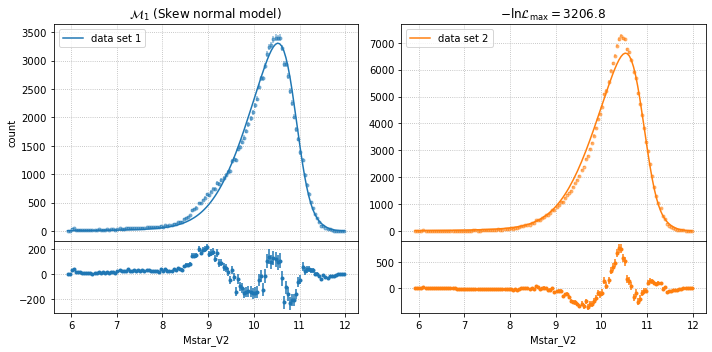

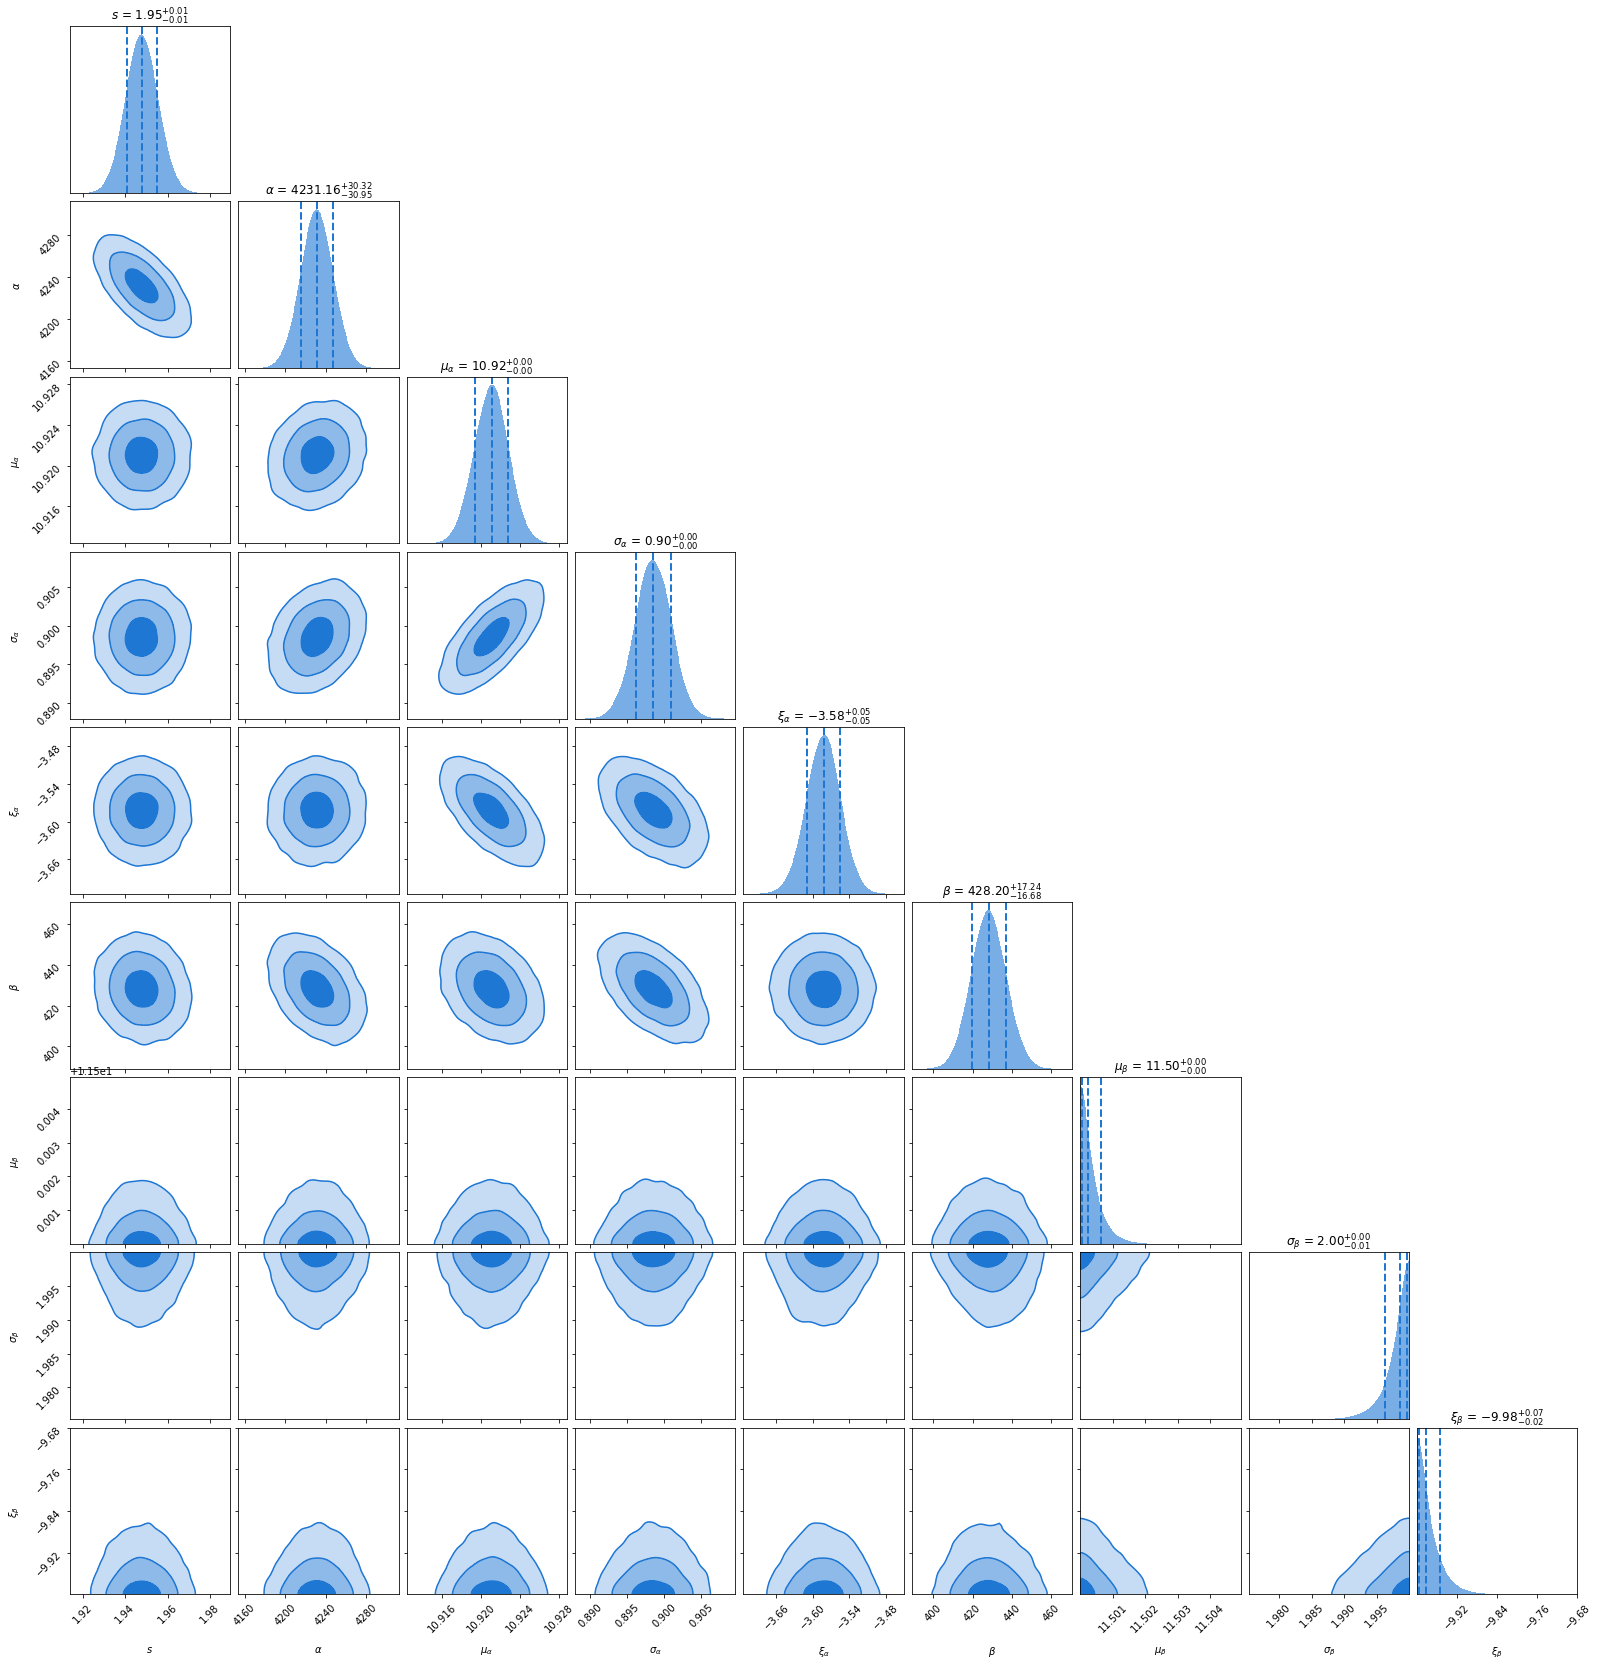

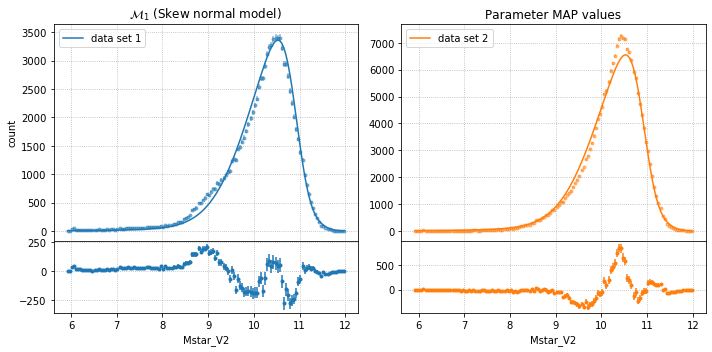

In [14]:


# #for V2
# print("V2")
# plot_hist(data1_wall_v2,data2_void_v2,bins_,label_v2)
# print("Running Model 1 using V2...")

#model 1
Model_1_fit(bounds1,data1_wall_v2,data2_void_v2,bins_,label_v2)
Model_1_sampler(prior_xform1,data1_wall_v2,data2_void_v2,bins_,label_v2)
lnZ1_v2 = Model1_output(data1_wall_v2,data2_void_v2,bins_,label_v2)

print("Running Model 2 using V2...")



running minimizer...this might take a few minutes...
plotting best fit results...
running the nested sampler... this might take from minutes to hours...


iter: 1863 | batch: 0 | bound: 1 | nc: 25 | ncall: 18180 | eff(%):  9.973 | loglstar:   -inf <   -inf <    inf | logz:   -inf +/-  0.206 | dlogz:    inf >  0.010                                     /home/fzaidoun/anaconda3/envs/him/lib/python3.6/site-packages/dynesty/sampling.py:221: UserWarning: Random number generation appears to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random number generation appears to be "
iter: 9949 | batch: 0 | bound: 125 | nc: 25 | ncall: 220565 | eff(%):  4.500 | loglstar:   -inf < -10507.277 <    inf | logz: -10534.061 +/-  0.327 | dlogz: 5422.425 >  0.010                        /home/fzaidoun/anaconda3/envs/him/lib/python3.6/site-packages/dynesty/sampling.py:221: UserWarning: Random number generation appears to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random number generation appears to be "
iter: 10121 | batch: 0 | bound: 128 | nc: 25 | ncall: 224898 | eff(%):  4.490 | logl

iter: 14954 | batch: 0 | bound: 205 | nc: 25 | ncall: 348079 | eff(%):  4.290 | loglstar:   -inf < -4771.866 <    inf | logz: -4806.476 +/-  0.367 | dlogz: 376.210 >  0.010                          /home/fzaidoun/anaconda3/envs/him/lib/python3.6/site-packages/dynesty/sampling.py:221: UserWarning: Random number generation appears to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random number generation appears to be "
iter: 15061 | batch: 0 | bound: 207 | nc: 25 | ncall: 350880 | eff(%):  4.286 | loglstar:   -inf < -4750.563 <    inf | logz: -4785.216 +/-  0.367 | dlogz: 354.715 >  0.010                          /home/fzaidoun/anaconda3/envs/him/lib/python3.6/site-packages/dynesty/sampling.py:221: UserWarning: Random number generation appears to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random number generation appears to be "
iter: 15169 | batch: 0 | bound: 209 | nc: 25 | ncall: 353808 | eff(%):  4.281 | logl

iter: 19111 | batch: 0 | bound: 272 | nc: 25 | ncall: 456474 | eff(%):  4.182 | loglstar:   -inf < -4362.492 <    inf | logz: -4403.427 +/-  0.399 | dlogz: 43.783 >  0.010                           /home/fzaidoun/anaconda3/envs/him/lib/python3.6/site-packages/dynesty/sampling.py:221: UserWarning: Random number generation appears to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random number generation appears to be "
iter: 19347 | batch: 0 | bound: 276 | nc: 25 | ncall: 462532 | eff(%):  4.178 | loglstar:   -inf < -4355.459 <    inf | logz: -4396.614 +/-  0.400 | dlogz: 37.988 >  0.010                           /home/fzaidoun/anaconda3/envs/him/lib/python3.6/site-packages/dynesty/sampling.py:221: UserWarning: Random number generation appears to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random number generation appears to be "
iter: 19609 | batch: 0 | bound: 280 | nc: 25 | ncall: 469476 | eff(%):  4.172 | logl

iter: 23976 | batch: 0 | bound: 348 | nc: 25 | ncall: 581900 | eff(%):  4.117 | loglstar:   -inf < -4309.544 <    inf | logz: -4357.003 +/-  0.428 | dlogz:  3.005 >  0.010                           /home/fzaidoun/anaconda3/envs/him/lib/python3.6/site-packages/dynesty/sampling.py:221: UserWarning: Random number generation appears to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random number generation appears to be "
iter: 24325 | batch: 0 | bound: 353 | nc: 25 | ncall: 590819 | eff(%):  4.114 | loglstar:   -inf < -4308.805 <    inf | logz: -4356.626 +/-  0.429 | dlogz:  2.364 >  0.010                           /home/fzaidoun/anaconda3/envs/him/lib/python3.6/site-packages/dynesty/sampling.py:221: UserWarning: Random number generation appears to be extremely inefficient. Adjusting the scale-factor accordingly.
  warnings.warn("Random number generation appears to be "
iter: 24485 | batch: 0 | bound: 356 | nc: 25 | ncall: 595083 | eff(%):  4.111 | logl

sampler output saved as pickle file 'sampler_results_model2_Mstar_V2'
plotting corner plots...


/home/fzaidoun/anaconda3/envs/him/lib/python3.6/site-packages/dynesty/plotting.py:1199: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(span[i])
/home/fzaidoun/anaconda3/envs/him/lib/python3.6/site-packages/dynesty/plotting.py:2238: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  ax.set_ylim(span[1])
/home/fzaidoun/anaconda3/envs/him/lib/python3.6/site-packages/dynesty/plotting.py:2237: UserWarning: Attempting to set identical left == right == 0.0 results in singular transformations; automatically expanding.
  ax.set_xlim(span[0])


The maximum a posteriori (MAP) values of the parameters:  [ 4.65335687e+03  1.10067880e+01  1.14936795e+00 -4.50634366e+00
  0.00000000e+00  5.50752915e+00  4.47960859e-01 -4.84106361e-02
  9.06056518e+03  1.09507157e+01  9.43074555e-01 -3.37591544e+00
  0.00000000e+00  5.50245212e+00  4.39718788e-01  3.70895898e-02]
Best fit results: 
Bayesian Evidence for model 2 :  -4355.747057836269


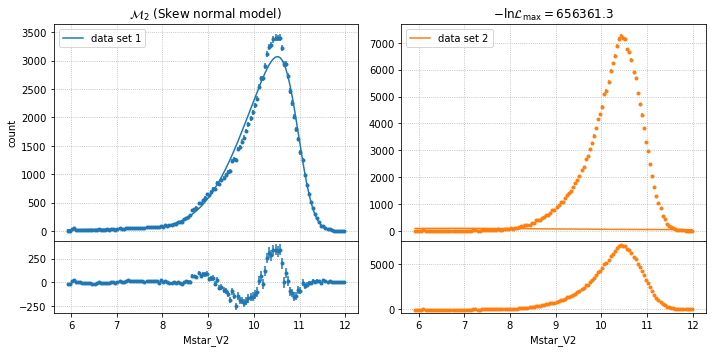

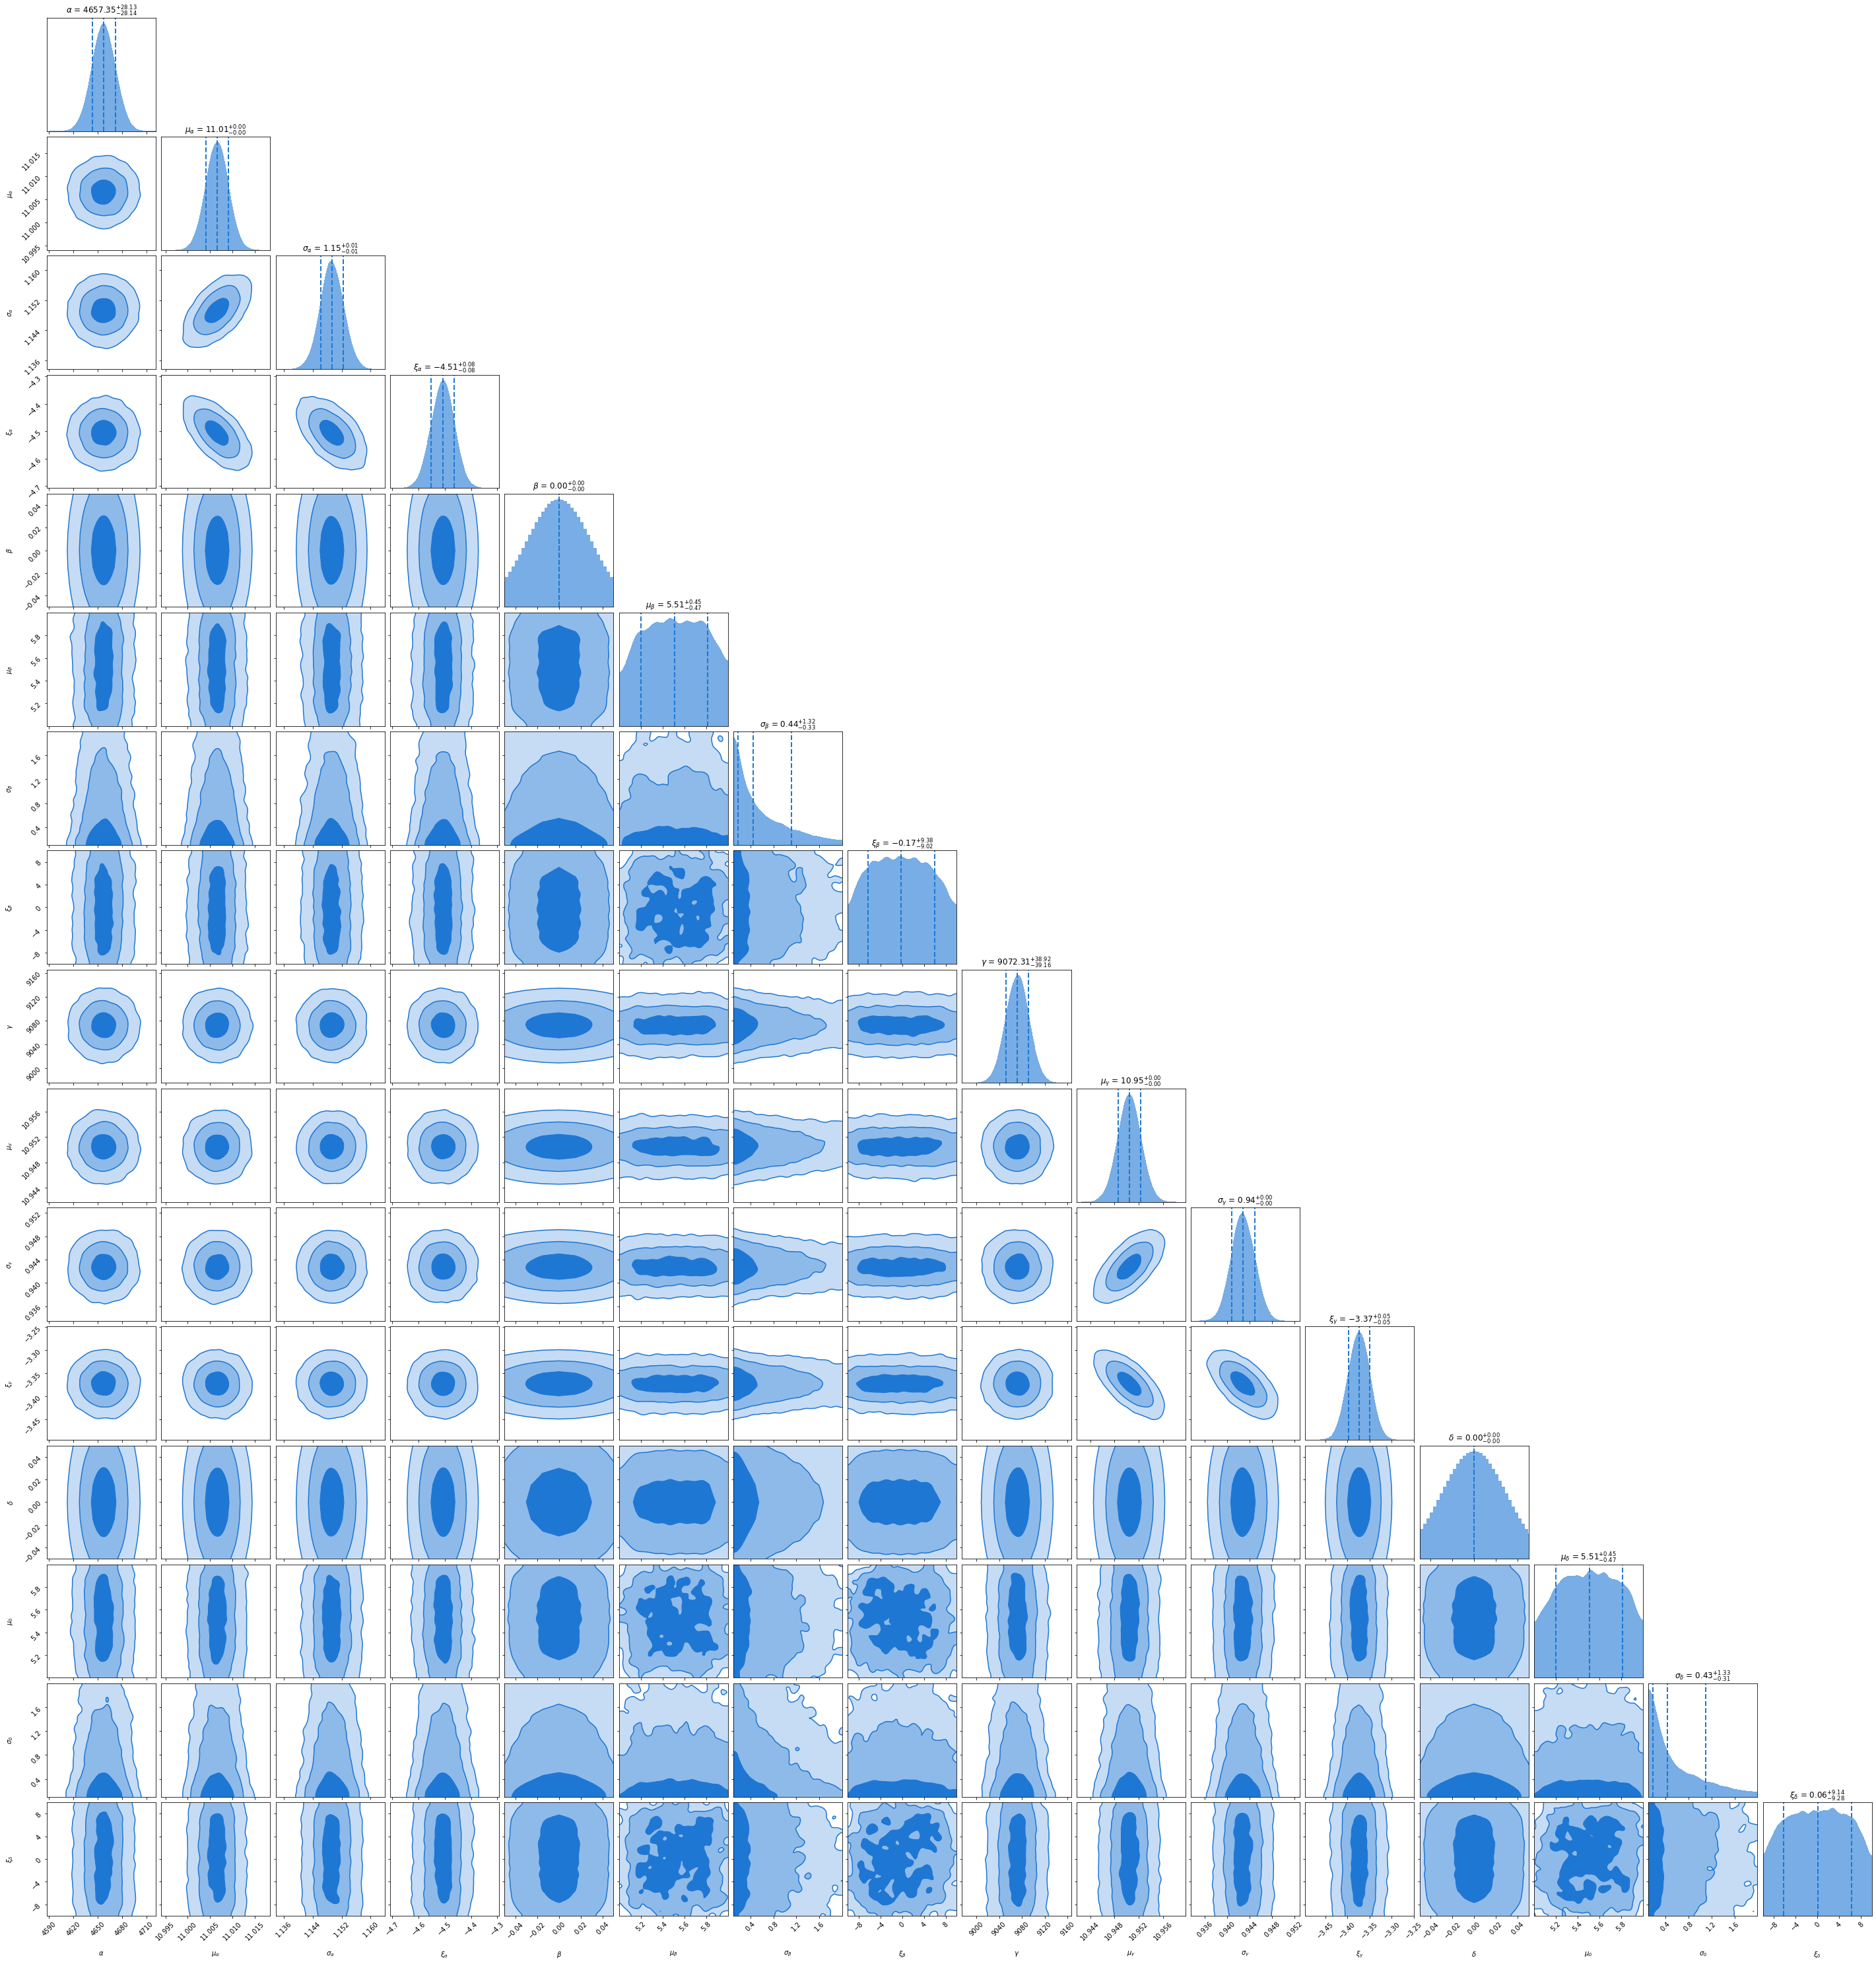

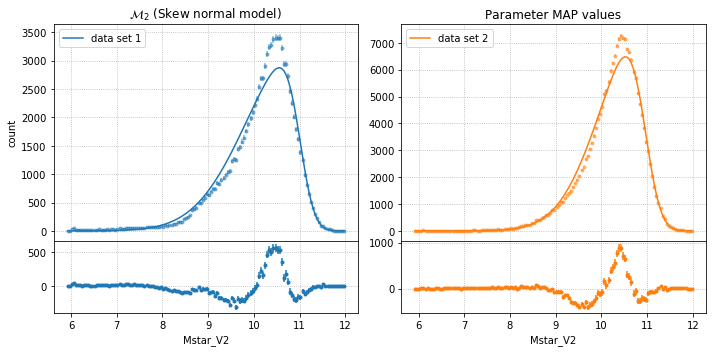

In [16]:
#model2
Model_2_fit(bounds2,data1_wall_v2,data2_void_v2,bins_,label_v2)
Model_2_sampler(prior_xform2,data1_wall_v2,data2_void_v2,bins_,label_v2)
lnZ2_v2 = Model2_output(data1_wall_v2,data2_void_v2,bins_,label_v2)


# #Baye's Factor
# lnB12_v2 = lnZ1_v2 - lnZ2_v2
# logB12_v2 = 0.434 * lnB12_v2

# print("Log of Baye's Factor for g-r using V2 is: ", logB12_v2)